



Epoch 1/10


18/18 [==============================] - 11s 550ms/step - loss: 2.1567 - accuracy: 0.4198 - val_loss: 1.5654 - val_accuracy: 0.5661
Epoch 2/10
18/18 [==============================] - 10s 546ms/step - loss: 1.5131 - accuracy: 0.5608 - val_loss: 1.4785 - val_accuracy: 0.5714
Epoch 3/10
18/18 [==============================] - 10s 547ms/step - loss: 1.2880 - accuracy: 0.6243 - val_loss: 1.3650 - val_accuracy: 0.5873
Epoch 4/10
18/18 [==============================] - 10s 550ms/step - loss: 1.1671 - accuracy: 0.6684 - val_loss: 1.2088 - val_accuracy: 0.6138
Epoch 5/10
18/18 [==============================] - 10s 551ms/step - loss: 1.0370 - accuracy: 0.6737 - val_loss: 1.2360 - val_accuracy: 0.7566
Epoch 6/10
18/18 [==============================] - 10s 549ms/step - loss: 0.9807 - accuracy: 0.7319 - val_loss: 1.0012 - val_accuracy: 0.7460
Epoch 7/10
18/18 [==============================] - 10s 558ms/step - loss: 0.9156 - accuracy: 0.7407 - val_loss: 0.9984 - val_accuracy: 

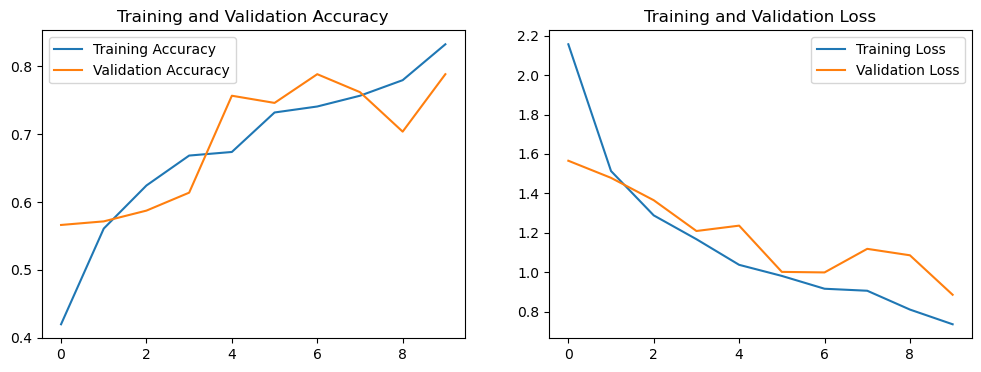

6/6 [==============================] - 1s 122ms/step - loss: 0.8678 - accuracy: 0.8201
Test Accuracy: 82.01%


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Directory paths
base_dir = 'C:\\Users\\Adven\\Documents\\Jupyter_Notebook_Spring2024\\Project_1\\Final_Malaria_Data\\'
classes = os.listdir(base_dir)

# Load and partition dataset
def load_data():
    images = []
    labels = []
    for label, class_name in enumerate(classes):
        class_dir = os.path.join(base_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(label)
    return train_test_split(np.array(images), np.array(labels), test_size=0.4, random_state=42)

train_images, test_images, train_labels, test_labels = load_data()
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

# Normalize the images
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# Build the CNN model with best hyperparameters
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(4.8450764961487585e-05)),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.0011083922643732001)),
    MaxPooling2D(2, 2),
    Conv2D(224, (3, 3), activation='relu', kernel_regularizer=l2(0.00027087444014448477)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(3.8230970085041097e-05)),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=l2(0.0021025670482126687)),
    Dense(len(classes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Trial 30 Complete [00h 02m 20s]
val_accuracy: 0.7989417910575867

Best val_accuracy So Far: 0.8306878209114075
Total elapsed time: 00h 22m 50s
Epoch 1/10
18/18 [==============================] - 6s 261ms/step - loss: 0.7348 - accuracy: 0.7795 - val_loss: 0.8521 - val_accuracy: 0.7672
Epoch 2/10
18/18 [==============================] - 5s 253ms/step - loss: 0.7224 - accuracy: 0.7778 - val_loss: 0.8406 - val_accuracy: 0.7937
Epoch 3/10
18/18 [==============================] - 4s 250ms/step - loss: 0.6561 - accuracy: 0.8183 - val_loss: 0.8955 - val_accuracy: 0.7778
Epoch 4/10
18/18 [==============================] - 5s 255ms/step - loss: 0.6433 - accuracy: 0.8095 - val_loss: 0.9709 - val_accuracy: 0.7407
Epoch 5/10
18/18 [==============================] - 4s 251ms/step - loss: 0.5948 - accuracy: 0.8254 - val_loss: 0.7907 - val_accuracy: 0.8201
Epoch 6/10
18/18 [==============================] - 5s 252ms/step - loss: 0.5506 - accuracy: 0.8430 - val_loss: 0.7697 - val_accuracy: 0.7989
Epoch

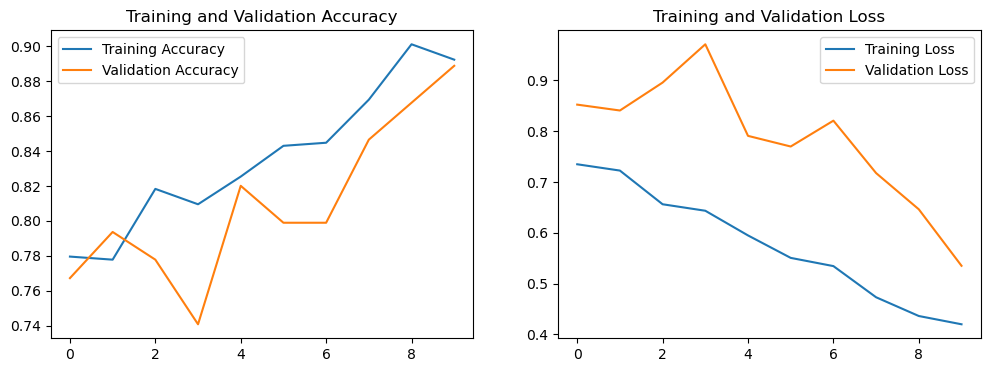

6/6 [==============================] - 0s 64ms/step - loss: 0.6220 - accuracy: 0.8466
Test Accuracy: 84.66%


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from kerastuner.tuners import Hyperband
import matplotlib.pyplot as plt

# Directory paths
base_dir = 'C:\\Users\\Adven\\Documents\\Jupyter_Notebook_Spring2024\\Project_1\\Final_Malaria_Data\\'
classes = os.listdir(base_dir)

# Load and partition dataset
def load_data():
    images = []
    labels = []
    for label, class_name in enumerate(classes):
        class_dir = os.path.join(base_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(label)
    return train_test_split(np.array(images), np.array(labels), test_size=0.4, random_state=42)

train_images, test_images, train_labels, test_labels = load_data()
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

# Normalize the images
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# Function to build the model with hyperparameters
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('input_units', min_value=32, max_value=256, step=32),
                     (3, 3), activation='relu', input_shape=(128, 128, 3),
                     kernel_regularizer=l2(hp.Float('input_l2', min_value=1e-5, max_value=1e-2, sampling='LOG'))))
    model.add(MaxPooling2D(2, 2))

    for i in range(hp.Int('n_conv_layers', 1, 4)):
        model.add(Conv2D(hp.Int(f'conv_{i}_units', min_value=32, max_value=256, step=32),
                         (3, 3), activation='relu',
                         kernel_regularizer=l2(hp.Float(f'conv_{i}_l2', min_value=1e-5, max_value=1e-2, sampling='LOG'))))
        model.add(MaxPooling2D(2, 2))

    model.add(Flatten())

    for i in range(hp.Int('n_dense_layers', 1, 3)):
        model.add(Dense(hp.Int(f'dense_{i}_units', min_value=32, max_value=512, step=32), activation='relu',
                        kernel_regularizer=l2(hp.Float(f'dense_{i}_l2', min_value=1e-5, max_value=1e-2, sampling='LOG'))))
        model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(len(classes), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the tuner
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    directory='my_dir',
    project_name='malaria_classification_v6'
)

# Perform hyperparameter search
tuner.search(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the model with the best hyperparameters
history = best_model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the best model on test data
test_loss, test_accuracy = best_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


In [5]:
# Print the best model's hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best model hyperparameters:")
for key, value in best_hyperparameters.values.items():
    print(f"{key}: {value}")

Best model hyperparameters:
input_units: 32
input_l2: 5.5746330760608164e-05
n_conv_layers: 3
conv_0_units: 192
conv_0_l2: 0.0010038738648335292
n_dense_layers: 1
dense_0_units: 224
dense_0_l2: 1.2419272409067647e-05
dropout: 0.1
conv_1_units: 64
conv_1_l2: 0.009962588456540265
dense_1_units: 512
dense_1_l2: 0.00011757292186052226
dense_2_units: 32
dense_2_l2: 0.001228280540765613
conv_2_units: 64
conv_2_l2: 0.003941508483788769
conv_3_units: 32
conv_3_l2: 0.00010608811969746797
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012


Epoch 1/10
18/18 [==============================] - 6s 262ms/step - loss: 2.3347 - accuracy: 0.3986 - val_loss: 2.0541 - val_accuracy: 0.5820
Epoch 2/10
18/18 [==============================] - 4s 250ms/step - loss: 1.5565 - accuracy: 0.5679 - val_loss: 1.3724 - val_accuracy: 0.5714
Epoch 3/10
18/18 [==============================] - 4s 248ms/step - loss: 1.2151 - accuracy: 0.6314 - val_loss: 1.0937 - val_accuracy: 0.6561
Epoch 4/10
18/18 [==============================] - 5s 253ms/step - loss: 1.0117 - accuracy: 0.6772 - val_loss: 1.0163 - val_accuracy: 0.6720
Epoch 5/10
18/18 [==============================] - 5s 254ms/step - loss: 0.9061 - accuracy: 0.7055 - val_loss: 0.9220 - val_accuracy: 0.6931
Epoch 6/10
18/18 [==============================] - 5s 252ms/step - loss: 0.8443 - accuracy: 0.7196 - val_loss: 0.9277 - val_accuracy: 0.7513
Epoch 7/10
18/18 [==============================] - 5s 264ms/step - loss: 0.7589 - accuracy: 0.7619 - val_loss: 1.1064 - val_accuracy: 0.7778
Epoch 

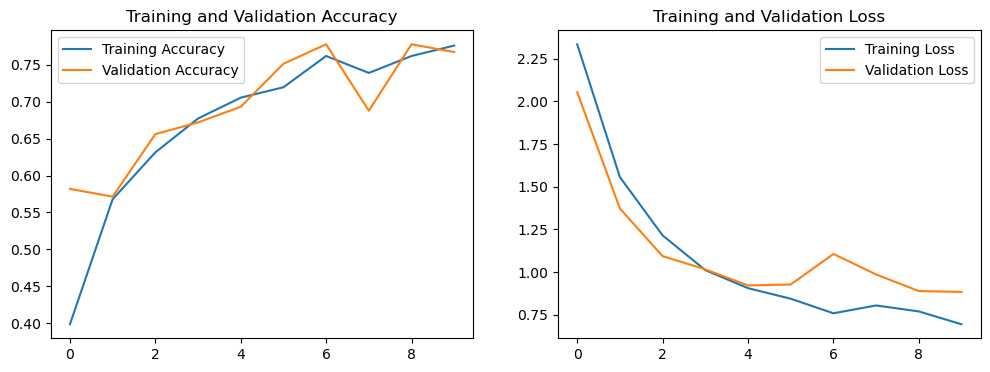

6/6 [==============================] - 0s 66ms/step - loss: 0.8306 - accuracy: 0.7196
Test Accuracy: 71.96%


In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Directory paths
base_dir = 'C:\\Users\\Adven\\Documents\\Jupyter_Notebook_Spring2024\\Project_1\\Final_Malaria_Data\\'
classes = os.listdir(base_dir)

# Load and partition dataset
def load_data():
    images = []
    labels = []
    for label, class_name in enumerate(classes):
        class_dir = os.path.join(base_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(label)
    return train_test_split(np.array(images), np.array(labels), test_size=0.4, random_state=42)

train_images, test_images, train_labels, test_labels = load_data()
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

# Normalize the images
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# Build the CNN model with the specified best hyperparameters
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(5.5746330760608164e-05)),
    MaxPooling2D(2, 2),
    Conv2D(192, (3, 3), activation='relu', kernel_regularizer=l2(0.0010038738648335292)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.009962588456540265)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.003941508483788769)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(224, activation='relu', kernel_regularizer=l2(1.2419272409067647e-05)),
    Dropout(0.1),
    Dense(512, activation='relu', kernel_regularizer=l2(0.00011757292186052226)),
    Dense(len(classes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
